# House Price Prediction

In [210]:
# Importing the Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

sb.set_style("darkgrid")

In [211]:
# Importing the Data Set
house = pd.read_csv("kc_house_data.csv")

## About the Data

In [212]:
# Columns in the Data
house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [213]:
# First 10 rows of the Dataset
house.head(n = 10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [214]:
house.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [215]:
# Describing the Hosing Dataset
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [216]:
# Check for Duplicated Records

house.duplicated().sum()

0

**There is no Duplicate Records**

In [217]:
# Check for Null Values
house.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [218]:
house["date"] = [int(str(date)[:8]) for date in house["date"]]

In [219]:
house.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [220]:
house.sort_values(by = ["date"], ascending = True, inplace = True)

In [221]:
house.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16768,5561000190,20140502,437500.0,3,2.25,1970,35100,2.0,0,0,...,9,1970,0,1977,0,98027,47.4635,-121.991,2340,35100
9596,472000620,20140502,790000.0,3,2.50,2600,4750,1.0,0,0,...,9,1700,900,1951,0,98117,47.6833,-122.400,2380,4750
9587,1024069009,20140502,675000.0,5,2.50,2820,67518,2.0,0,0,...,8,2820,0,1979,0,98029,47.5794,-122.025,2820,48351
20602,7853361370,20140502,555000.0,4,2.50,3310,6500,2.0,0,0,...,8,3310,0,2012,0,98065,47.5150,-121.870,2380,5000
11577,5056500260,20140502,440000.0,4,2.25,2160,8119,1.0,0,0,...,8,1080,1080,1966,0,98006,47.5443,-122.177,1850,9000
20559,3438501320,20140502,295000.0,2,2.50,1630,1368,2.0,0,0,...,7,1280,350,2009,0,98106,47.5489,-122.363,1590,2306
18690,1737320120,20140502,470000.0,5,2.50,2210,9655,1.0,0,0,...,8,1460,750,1976,0,98011,47.7698,-122.222,2080,8633
1041,7197300105,20140502,550000.0,4,2.50,1940,10500,1.0,0,0,...,7,1140,800,1976,0,98052,47.6830,-122.114,2200,10500
172,1999700045,20140502,313000.0,3,1.50,1340,7912,1.5,0,0,...,7,1340,0,1955,0,98133,47.7658,-122.339,1480,7940
7734,1962200037,20140502,626000.0,3,2.25,1750,1572,2.5,0,0,...,9,1470,280,2005,0,98102,47.6498,-122.321,2410,3050


## Visualization of the Dataset

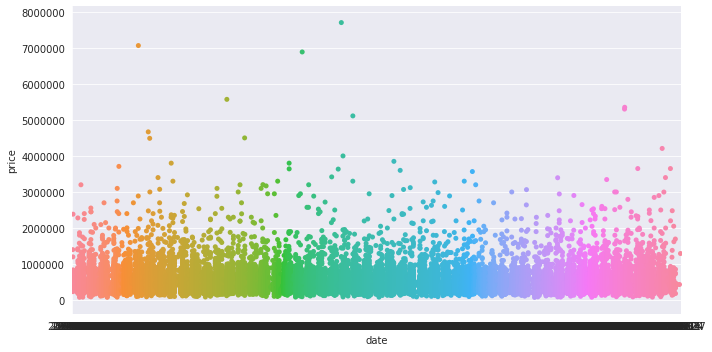

In [111]:
sb.catplot(x = "date", y = "price", data = house, height = 5, aspect = 2)

In [112]:
house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

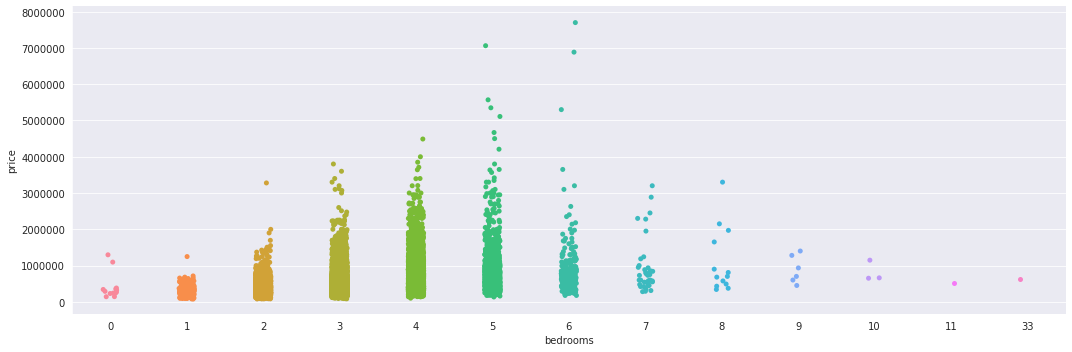

In [117]:
sb.catplot(x = "bedrooms", y = "price", data = house, aspect = 3)

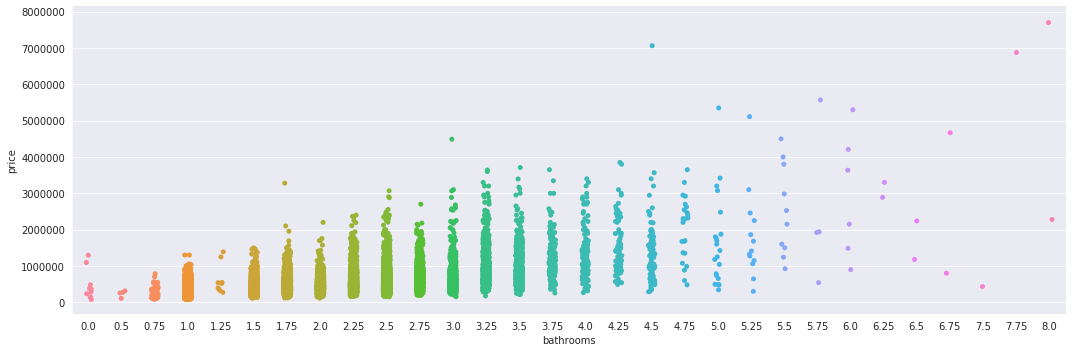

In [116]:
sb.catplot(x = "bathrooms", y = "price", data = house, aspect = 3)

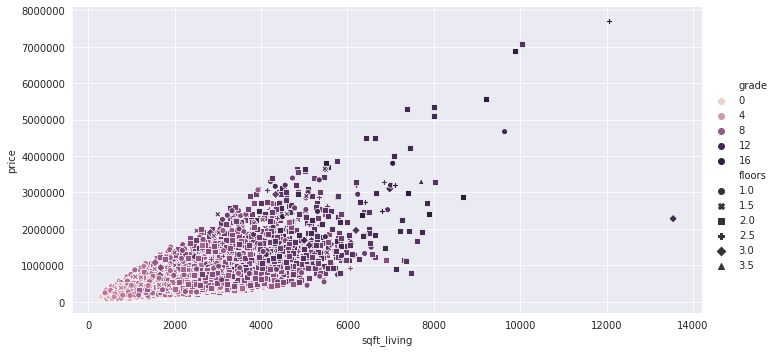

In [131]:
sb.relplot(x = "sqft_living", y = "price", data = house, hue = "grade", style = "floors", height = 5, aspect = 2)

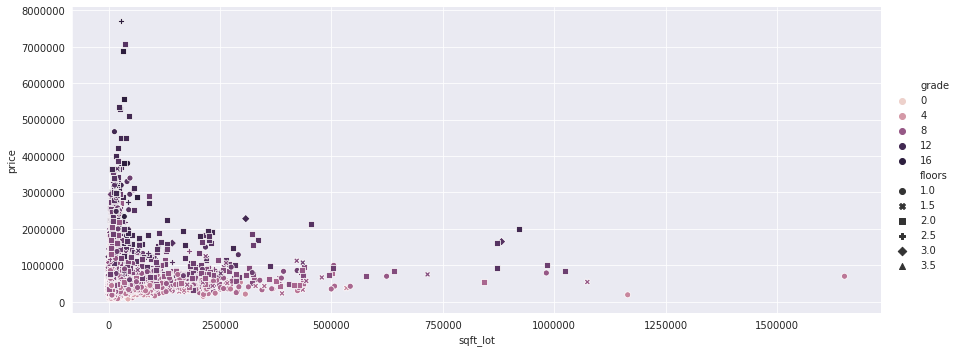

In [132]:
sb.relplot(x = "sqft_lot", y = "price", data = house, hue = "grade", style = "floors", aspect = 2.5)

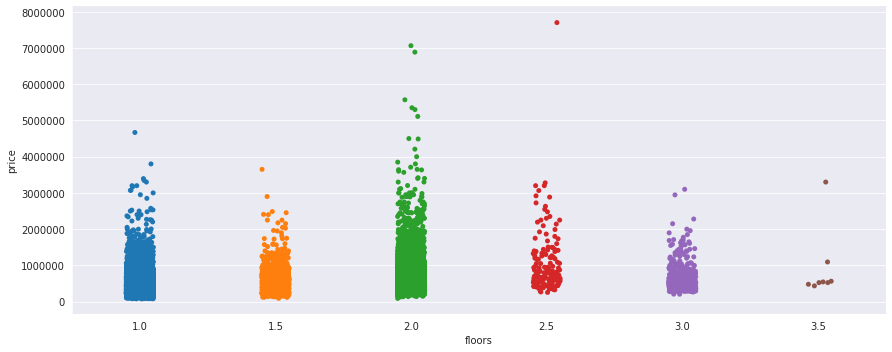

In [137]:
sb.catplot(x = "floors", y = "price", data = house, aspect = 2.5)

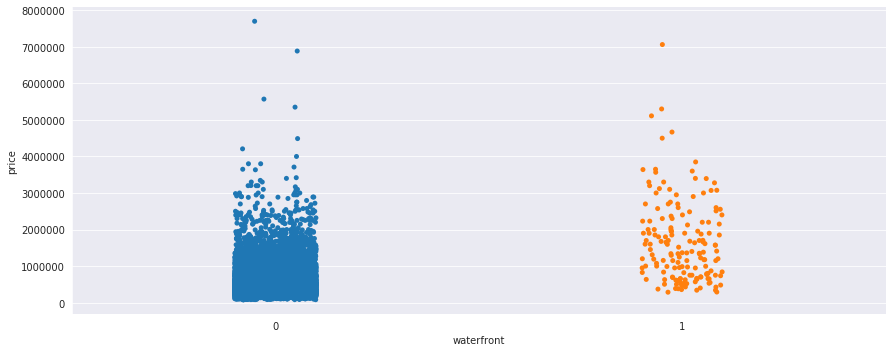

In [142]:
sb.catplot(x = "waterfront", y = "price", data = house, aspect = 2.5)

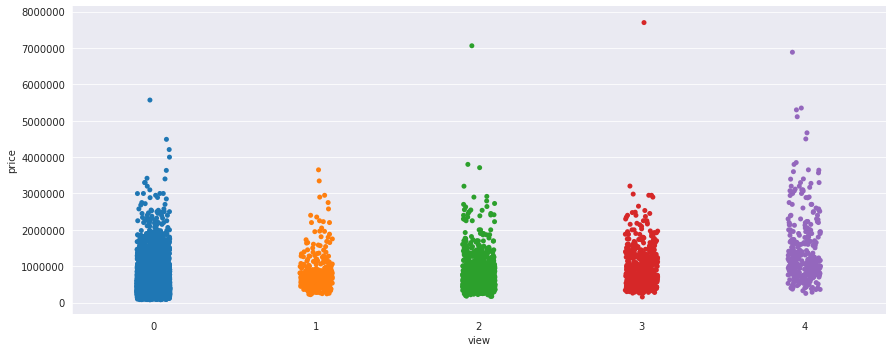

In [143]:
sb.catplot(x = "view", y = "price", data = house, aspect = 2.5)

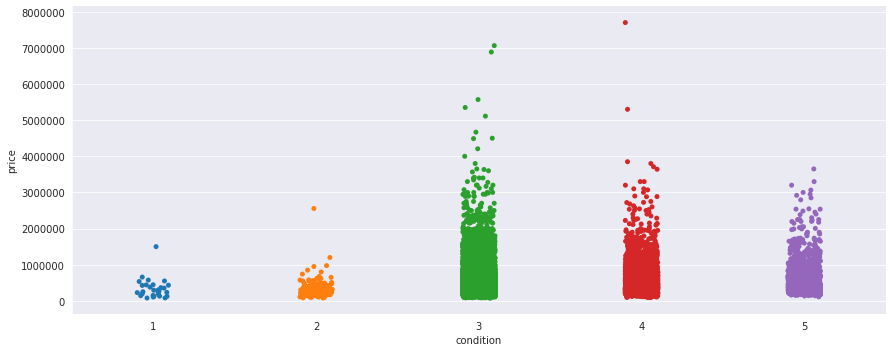

In [145]:
sb.catplot(x = "condition", y = "price", data = house, aspect = 2.5)

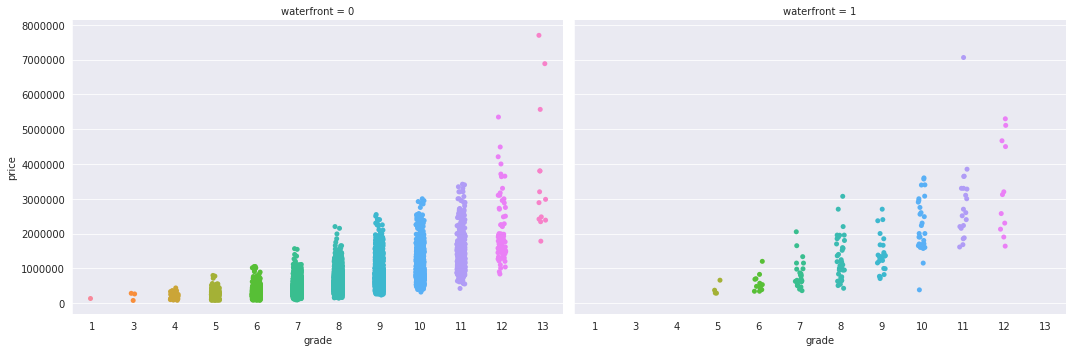

In [149]:
sb.catplot(x = "grade", y = "price", data = house, col = "waterfront", aspect = 1.5)

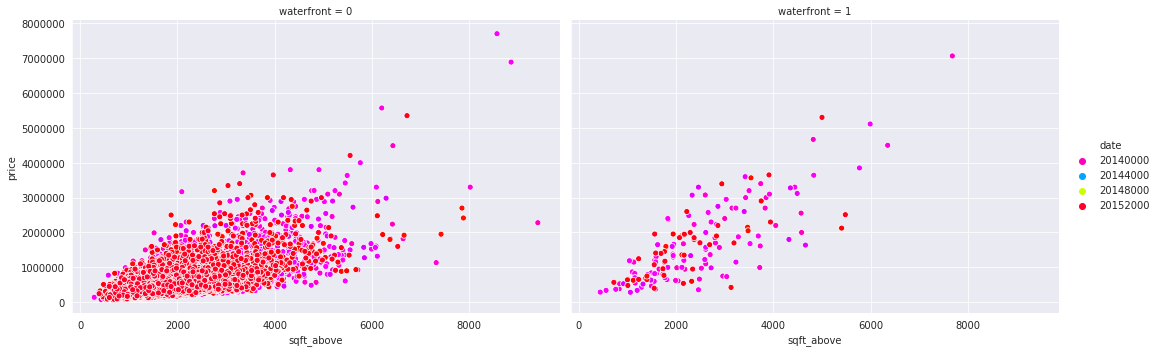

In [160]:
sb.set_style("darkgrid")
sb.relplot(x = "sqft_above", y = "price", data = house, hue = "date", col = "waterfront",
           aspect = 1.5, palette = "gist_rainbow_r")

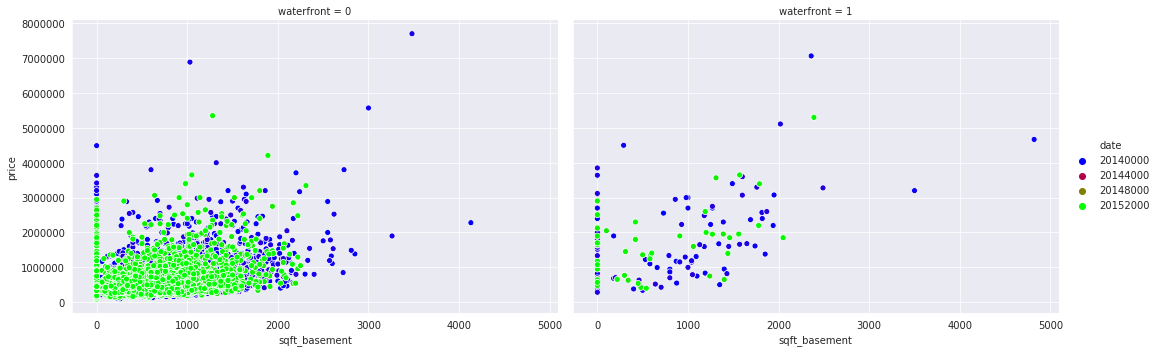

In [163]:
sb.relplot(x = "sqft_basement", y = "price", data = house, hue = "date", col = "waterfront",
          aspect = 1.5, palette = "brg")

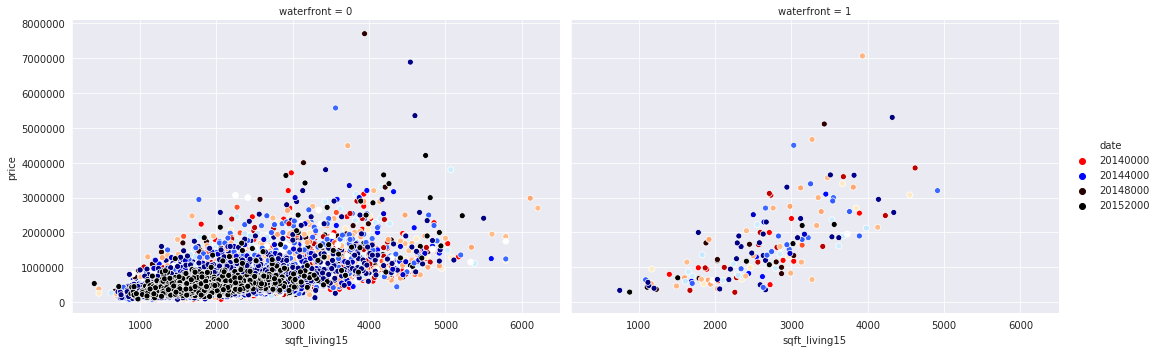

In [164]:
sb.relplot(x = "sqft_living15", y = "price", data = house, hue = "date", col = "waterfront",
          aspect = 1.5, palette = "flag")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5469189510>]],
      dtype=object)

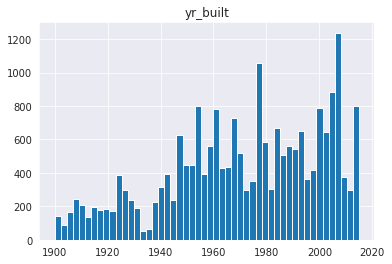

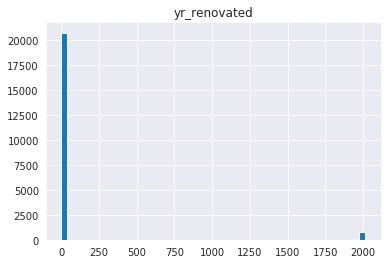

In [183]:
house.hist(column = "yr_built", bins = 50)
house.hist(column = 'yr_renovated', bins = 50)

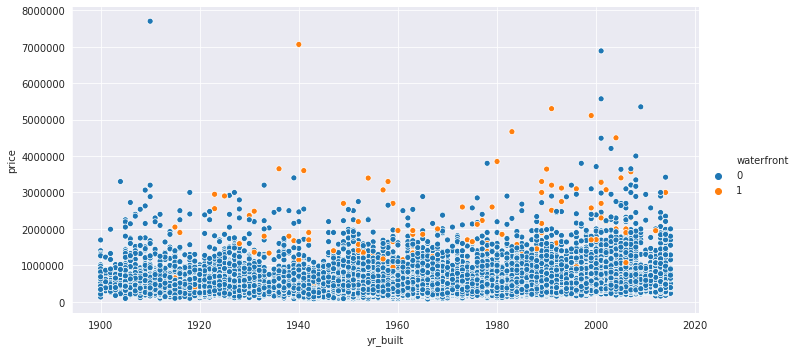

In [174]:
sb.relplot(x = "yr_built", y = "price", data = house, hue = "waterfront", aspect = 2)

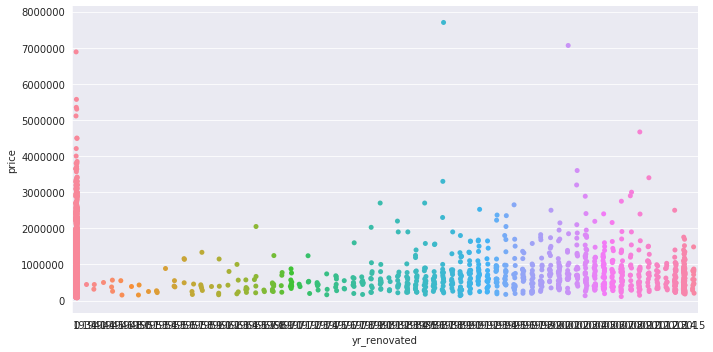

In [187]:
sb.catplot(x = "yr_renovated", y = "price", data = house, aspect = 2)

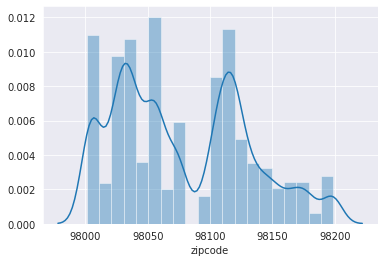

In [190]:
sb.distplot(a = house["zipcode"], bins = 20)

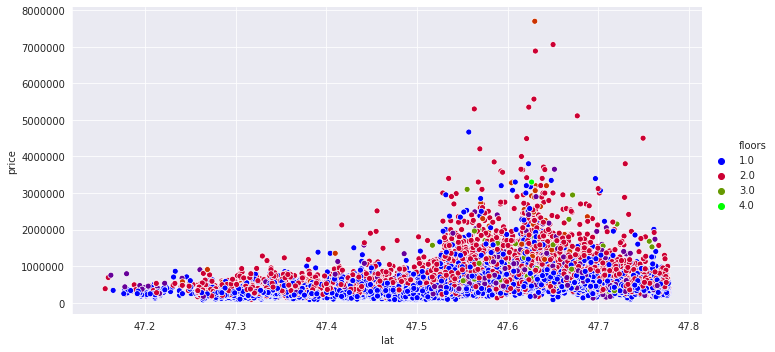

In [194]:
sb.relplot(x = "lat", y = "price", data = house, hue = "floors", palette = "brg", aspect = 2)

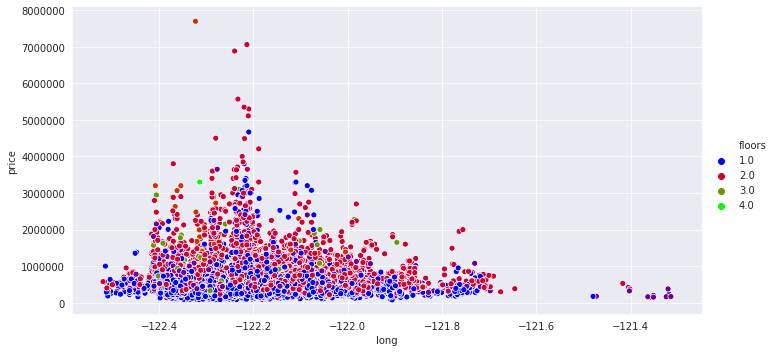

In [195]:
sb.relplot(x = "long", y = "price", data = house, hue = "floors", palette = "brg", aspect = 2)

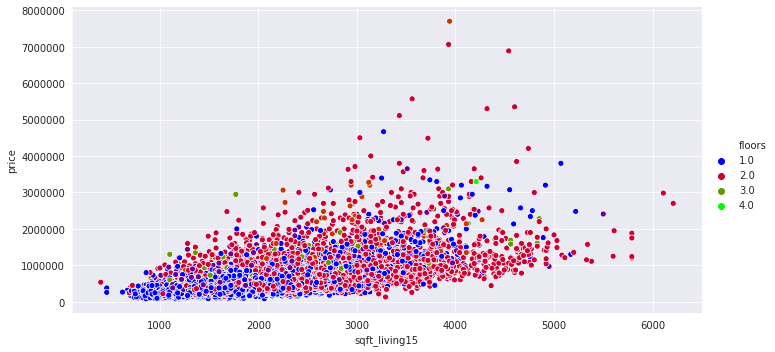

In [196]:
sb.relplot(x = "sqft_living15", y = "price", data = house, hue = "floors", palette = "brg", aspect = 2)

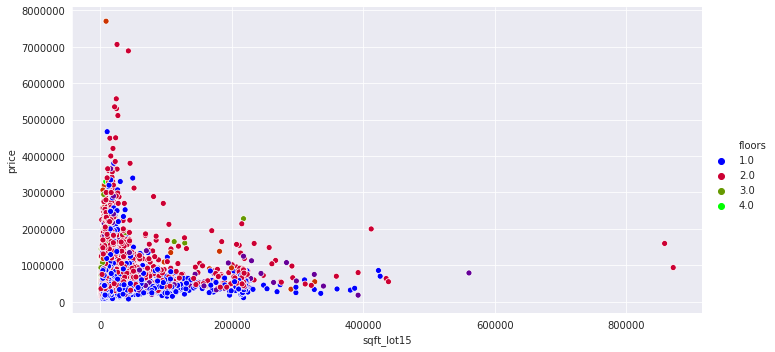

In [197]:
sb.relplot(x = "sqft_lot15", y = "price", data = house, hue = "floors", palette = "brg", aspect = 2)

## Correlation between the columns

(21.0, 0.0)

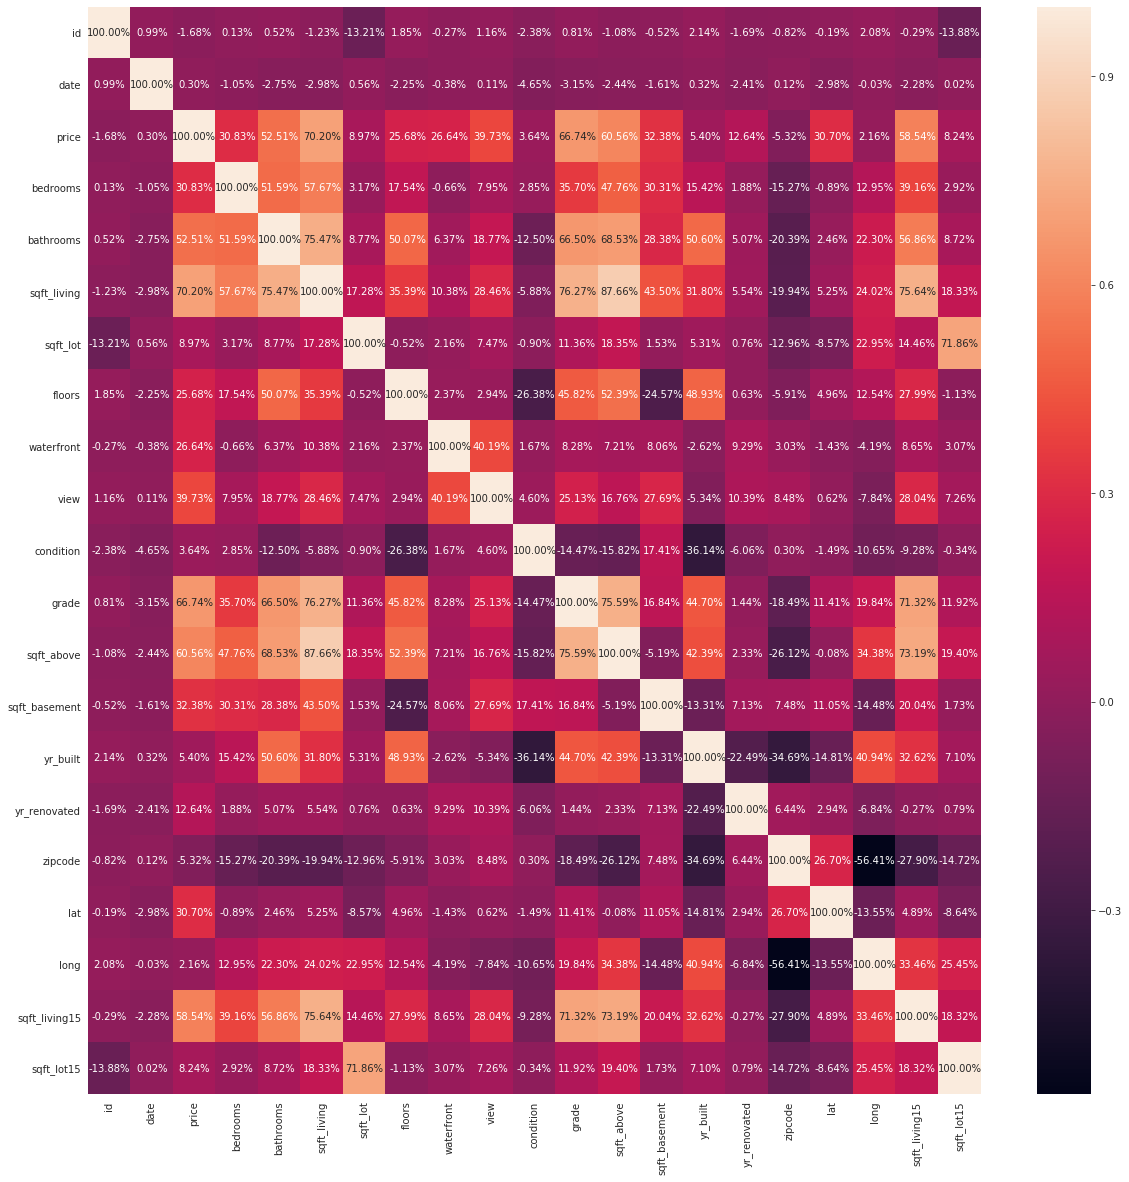

In [223]:
corr = house.corr()
corr

plt.figure(figsize = (20, 20))
sb.heatmap(data = corr, fmt = '.2%', annot = True)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

In [119]:
cols = ['sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
        'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
        'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

In [191]:
house["lat"].value_counts()

47.5491    17
47.5322    17
47.6624    17
47.6846    17
47.6711    16
           ..
47.4681     1
47.2819     1
47.6096     1
47.7324     1
47.1895     1
Name: lat, Length: 5034, dtype: int64